In [4]:
# This script is designed to preprocess a dataset, train a logistic regression model,
# and evaluate its performance using various metrics.
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("heart_attack_prediction_dataset.csv")

# Drop Patient ID (not useful for ML)
df.drop("Patient ID", axis=1, inplace=True)

# Convert Blood Pressure "120/80" → systolic & diastolic
bp_split = df["Blood Pressure"].str.split("/", expand=True)
df["Systolic BP"] = pd.to_numeric(bp_split[0], errors='coerce')
df["Diastolic BP"] = pd.to_numeric(bp_split[1], errors='coerce')
df.drop("Blood Pressure", axis=1, inplace=True)


In [6]:
cat_cols = ['Sex', 'Diet', 'Country', 'Continent', 'Hemisphere']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
df = df.dropna()  # or you can use df.fillna(method="ffill") for forward fill


In [7]:
X = df.drop("Heart Attack Risk", axis=1)
y = df["Heart Attack Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [10]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6417569880205363
Confusion Matrix:
 [[1125    0]
 [ 628    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      1.00      0.78      1125
           1       0.00      0.00      0.00       628

    accuracy                           0.64      1753
   macro avg       0.32      0.50      0.39      1753
weighted avg       0.41      0.64      0.50      1753



c:\Users\komal\OneDrive\Desktop\ML\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\komal\OneDrive\Desktop\ML\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\komal\OneDrive\Desktop\ML\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

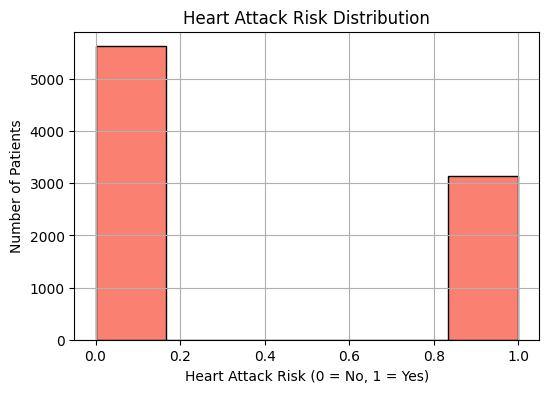

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.hist(df["Heart Attack Risk"], bins=6, color='salmon', edgecolor='black')
plt.title("Heart Attack Risk Distribution")
plt.xlabel("Heart Attack Risk (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()


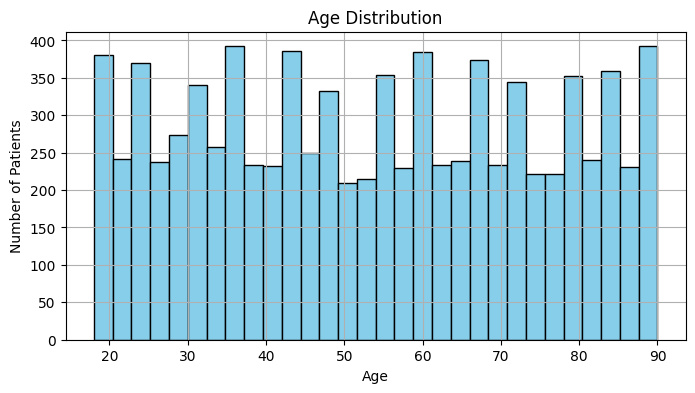

In [12]:
plt.figure(figsize=(8, 4))
plt.hist(df["Age"], bins=30, color='skyblue', edgecolor='black')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.grid(True)
plt.show()


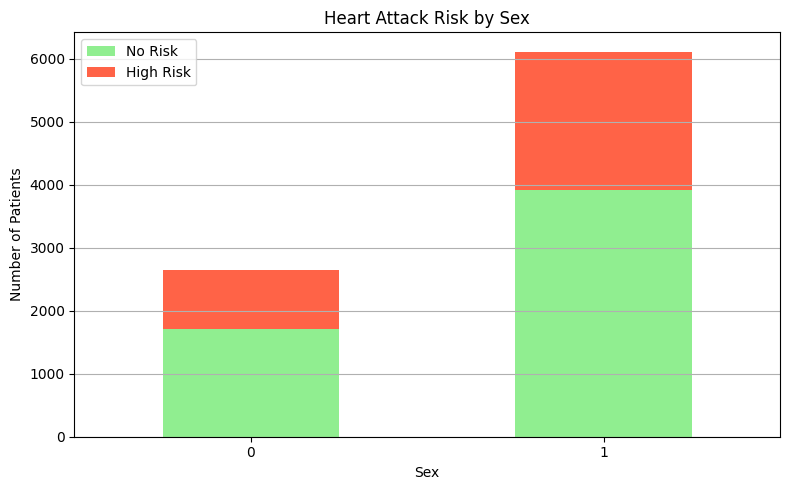

In [13]:
sex_group = df.groupby("Sex")["Heart Attack Risk"].value_counts().unstack()

sex_group.plot(kind="bar", stacked=True, color=['lightgreen', 'tomato'], figsize=(8,5))
plt.title("Heart Attack Risk by Sex")
plt.xlabel("Sex")
plt.ylabel("Number of Patients")
plt.xticks(rotation=0)
plt.legend(["No Risk", "High Risk"])
plt.grid(axis="y")
plt.tight_layout()
plt.show()


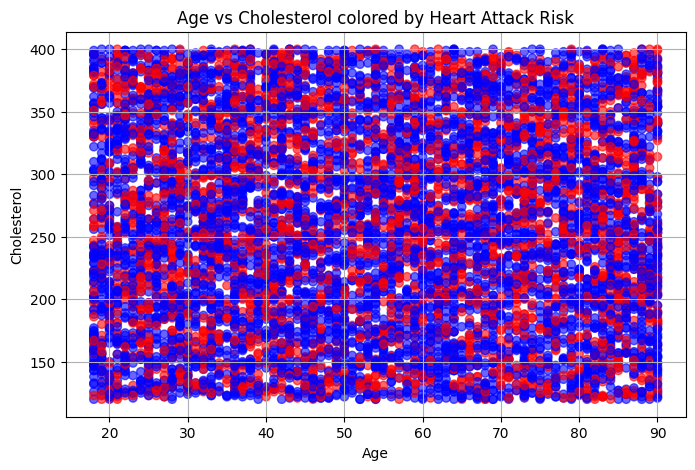

In [14]:
colors = df["Heart Attack Risk"].map({0: "blue", 1: "red"})

plt.figure(figsize=(8, 5))
plt.scatter(df["Age"], df["Cholesterol"], c=colors, alpha=0.6)
plt.title("Age vs Cholesterol colored by Heart Attack Risk")
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.grid(True)
plt.show()


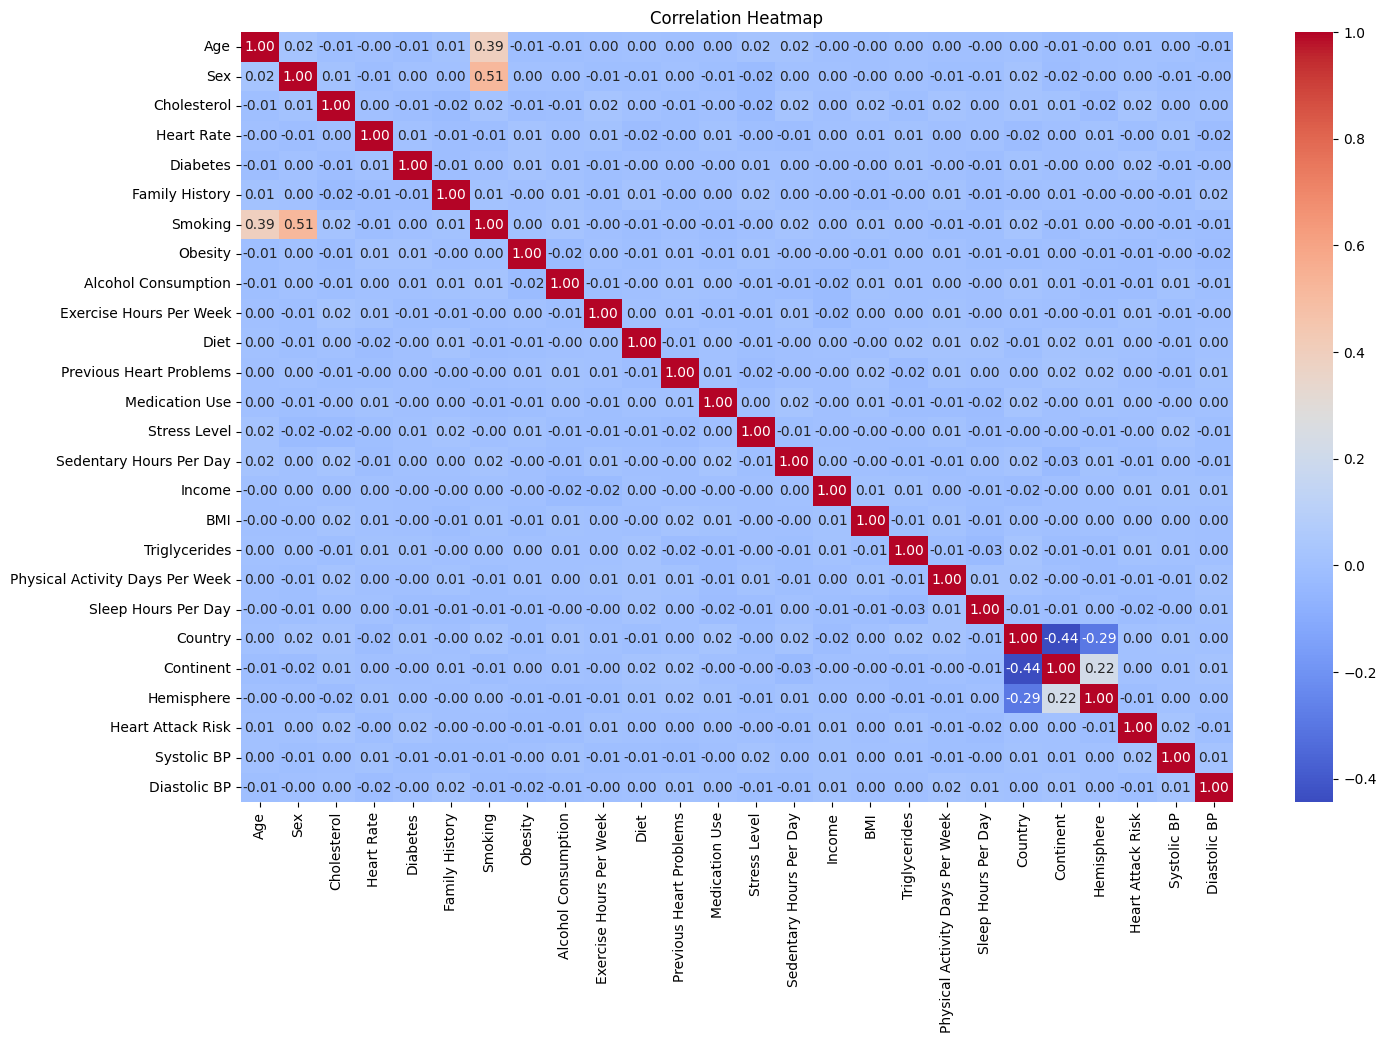

In [15]:
import seaborn as sns

plt.figure(figsize=(16, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
